<a href="https://colab.research.google.com/github/pathakswetank/Sports-Analysis/blob/main/IPL_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


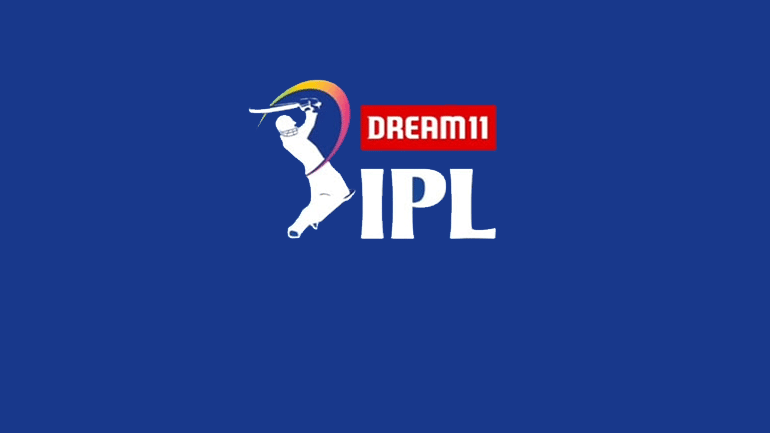

## **The aim of the analysis is to tier the player as per their batting performance.**

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df= pd.read_excel("/content/drive/My Drive/Data Science Project/IPL 2020.xlsx", sheet_name= "BAT")

In [3]:
df.head()

,POS,PLAYER,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,1,KL Rahul,14,14,2,670,132*,55.83,518,129.34,1,5,58,23
1,3,David Warner,16,16,2,548,85*,39.14,407,134.64,0,4,52,14
2,4,Shreyas Iyer,17,17,2,519,88*,34.6,421,123.27,0,3,40,16
3,5,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30
4,6,Quinton de Kock,16,16,2,503,78*,35.92,358,140.50,0,4,46,22


There are following features in a data set:
- POS : Postion of the Batsmen 
- PLAYER: Name of the Player
- Mat: Number of Matched Played
- Inns: Number of Innings Played
- NO: Not Out
- Runs: Total Runs Scored in a Session
- HS: Highest Score
- Avg: Batsmen's Average
- BF: Ball Faced
- SR: Strike Rate
- 100 : How many century scored?
- 50: How many half century scored?
- 4s: Number of fours hit by batsman
- 6s: Number of sixes hit by batsman


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   POS     99 non-null     int64  
 1   PLAYER  99 non-null     object 
 2   Mat     99 non-null     int64  
 3   Inns    99 non-null     int64  
 4   NO      99 non-null     int64  
 5   Runs    99 non-null     int64  
 6   HS      99 non-null     object 
 7   Avg     99 non-null     object 
 8   BF      99 non-null     int64  
 9   SR      99 non-null     float64
 10  100     99 non-null     int64  
 11  50      99 non-null     int64  
 12  4s      99 non-null     int64  
 13  6s      99 non-null     int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 11.0+ KB


In [5]:
df.Avg.value_counts()

-        4
5        2
13       2
16.5     2
25       2
        ..
22.2     1
18.16    1
8        1
12.33    1
15       1
Name: Avg, Length: 91, dtype: int64

In [6]:
df["Avg"]= df["Avg"].replace("-","0")

In [7]:
df.Avg

0     55.83
1     39.14
2      34.6
3     57.33
4     35.92
      ...  
94        4
95        6
96        0
97       11
98        5
Name: Avg, Length: 99, dtype: object

In [8]:
df.Avg = df.Avg.astype("float")


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   POS     99 non-null     int64  
 1   PLAYER  99 non-null     object 
 2   Mat     99 non-null     int64  
 3   Inns    99 non-null     int64  
 4   NO      99 non-null     int64  
 5   Runs    99 non-null     int64  
 6   HS      99 non-null     object 
 7   Avg     99 non-null     float64
 8   BF      99 non-null     int64  
 9   SR      99 non-null     float64
 10  100     99 non-null     int64  
 11  50      99 non-null     int64  
 12  4s      99 non-null     int64  
 13  6s      99 non-null     int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 11.0+ KB


In [10]:
df.columns

Index([   'POS', 'PLAYER',    'Mat',   'Inns',     'NO',   'Runs',     'HS',
          'Avg',     'BF',     'SR',      100,       50,     '4s',     '6s'],
      dtype='object')

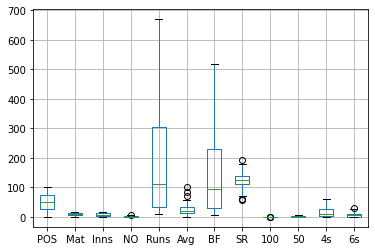

In [11]:
df.boxplot()

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
POS,99.0,50.989899,28.740391,1.00,26.500,51.00,75.50,100.00
Mat,99.0,10.272727,4.501288,1.00,7.000,11.00,14.00,17.00
Inns,99.0,8.171717,4.699198,1.00,3.500,8.00,12.00,17.00
NO,99.0,1.858586,1.622609,0.00,1.000,1.00,3.00,7.00
Runs,99.0,179.626263,165.767023,10.00,33.500,113.00,305.00,670.00
Avg,99.0,24.818889,17.350629,0.00,13.165,20.85,34.22,101.00
BF,99.0,135.959596,121.446967,8.00,29.500,95.00,231.50,518.00
SR,99.0,124.723232,26.516657,57.14,110.770,126.11,140.18,191.42
100,99.0,0.030303,0.172292,0.00,0.000,0.00,0.00,1.00
50,99.0,1.070707,1.437490,0.00,0.000,0.00,2.00,5.00


In [13]:
ipl_df= df.drop(columns= ["POS","PLAYER", "HS"])

In [15]:
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mat     99 non-null     int64  
 1   Inns    99 non-null     int64  
 2   NO      99 non-null     int64  
 3   Runs    99 non-null     int64  
 4   Avg     99 non-null     float64
 5   BF      99 non-null     int64  
 6   SR      99 non-null     float64
 7   100     99 non-null     int64  
 8   50      99 non-null     int64  
 9   4s      99 non-null     int64  
 10  6s      99 non-null     int64  
dtypes: float64(2), int64(9)
memory usage: 8.6 KB


In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
X = StandardScaler()
scaled_df= X.fit_transform(ipl_df)
scaled_df

array([[ 0.83225979,  1.2465838 ,  0.08759586, ...,  2.74735053,
         2.80231948,  2.04008425],
       [ 1.27883821,  1.67435433,  0.08759586, ...,  2.04815335,
         2.40870922,  0.87263719],
       [ 1.50212742,  1.88823959,  0.08759586, ...,  1.34895617,
         1.62148871,  1.13206987],
       ...,
       [-2.07049995, -1.53392461, -0.53183201, ..., -0.74863536,
        -0.87137624, -0.94339156],
       [-2.07049995, -1.53392461, -1.15125988, ..., -0.74863536,
        -0.93697795, -0.94339156],
       [-0.50747548, -1.10615408, -0.53183201, ..., -0.74863536,
        -0.93697795, -0.94339156]])

**KMEANS CLUSTERING**

In [18]:
from sklearn.cluster import KMeans

In [21]:
wss = []
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [22]:
wss

[1089.0,
 606.5333809245124,
 499.09053876781087,
 400.8536423478479,
 350.70350270770655,
 317.1288739548138,
 265.7037611600957,
 240.0078488273682,
 212.75972621803865,
 196.16628212350383]

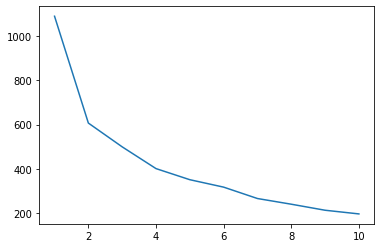

In [23]:
plt.plot(range(1,11), wss)

In [25]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
labels = k_means.labels_
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [26]:
df["Clus_kmeans"] = labels
df.head(5)

,POS,PLAYER,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s,Clus_kmeans
0,1,KL Rahul,14,14,2,670,132*,55.83,518,129.34,1,5,58,23,2
1,3,David Warner,16,16,2,548,85*,39.14,407,134.64,0,4,52,14,2
2,4,Shreyas Iyer,17,17,2,519,88*,34.60,421,123.27,0,3,40,16,2
3,5,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30,2
4,6,Quinton de Kock,16,16,2,503,78*,35.92,358,140.50,0,4,46,22,2


In [27]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [28]:
silhouette_score(scaled_df,labels)

0.2917302344762148

In [29]:
sil_width = silhouette_samples(scaled_df,labels)

In [30]:
df["sil_width"] = sil_width
df.head(5)

,POS,PLAYER,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s,Clus_kmeans,sil_width
0,1,KL Rahul,14,14,2,670,132*,55.83,518,129.34,1,5,58,23,2,0.254231
1,3,David Warner,16,16,2,548,85*,39.14,407,134.64,0,4,52,14,2,0.447561
2,4,Shreyas Iyer,17,17,2,519,88*,34.60,421,123.27,0,3,40,16,2,0.424985
3,5,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30,2,0.350674
4,6,Quinton de Kock,16,16,2,503,78*,35.92,358,140.50,0,4,46,22,2,0.455808


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


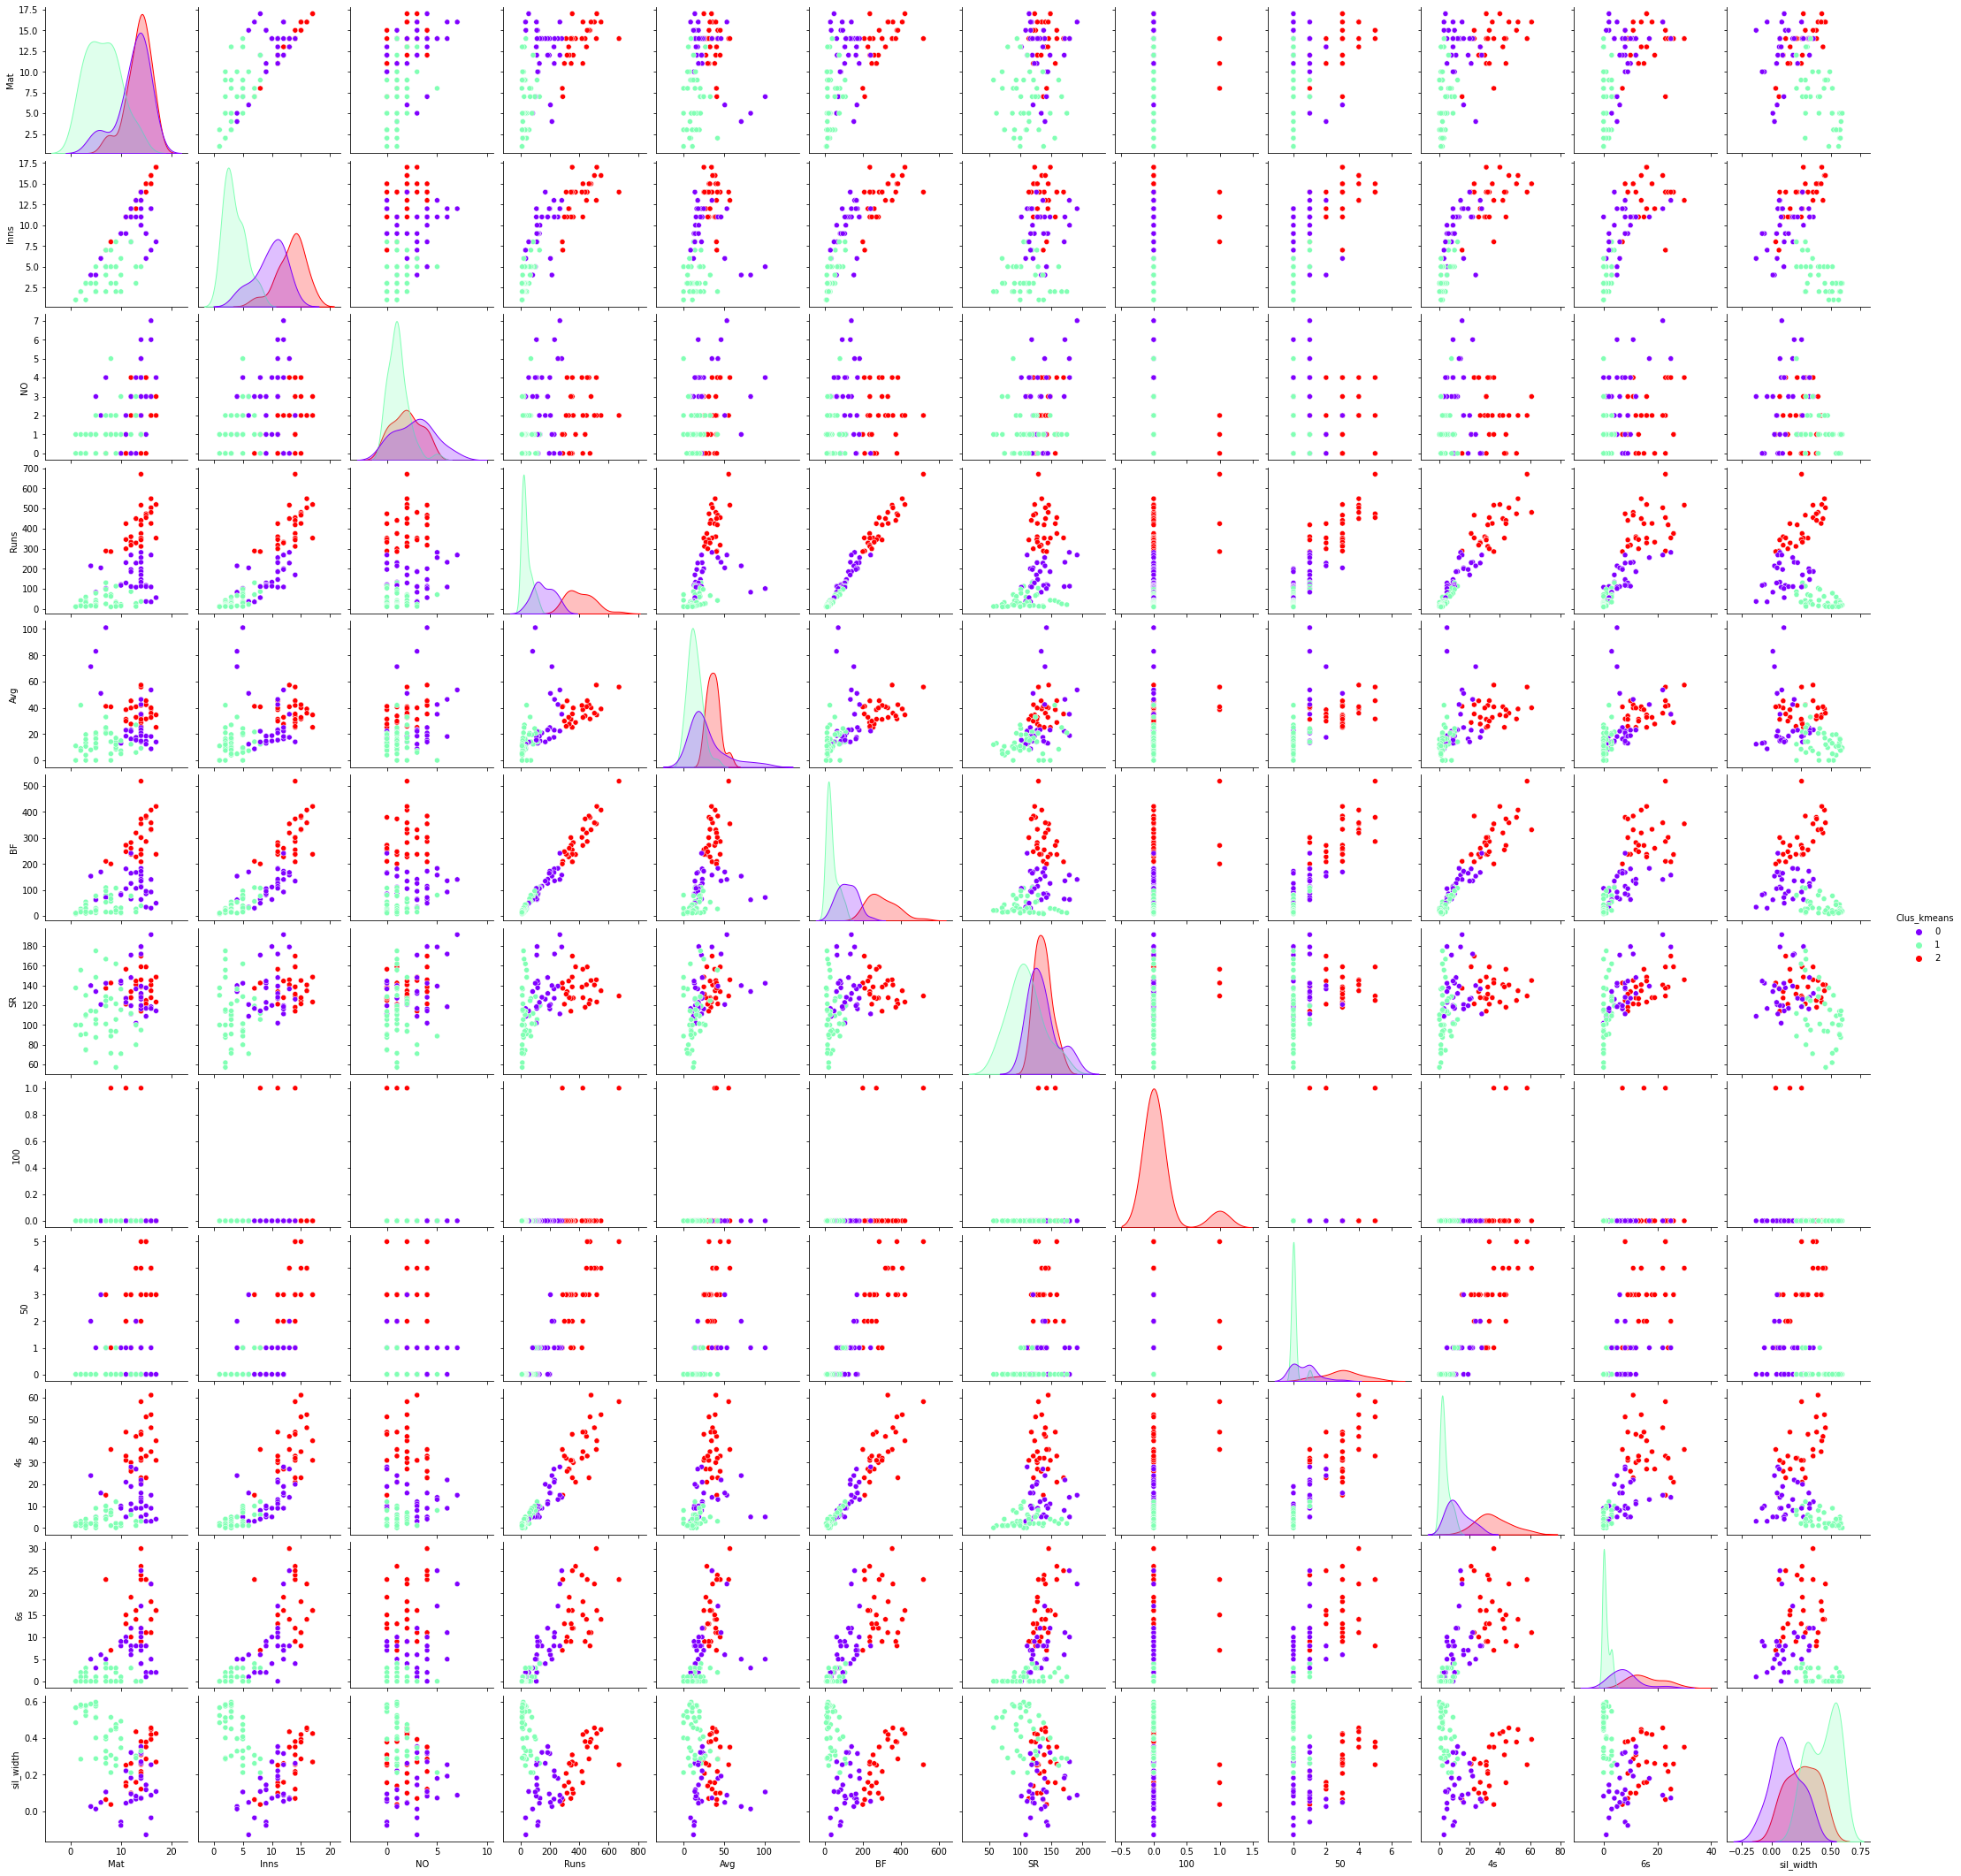

In [42]:
sns.pairplot(df.drop(['PLAYER' , 'HS', 'POS'],axis=1), hue = "Clus_kmeans", palette= "rainbow")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


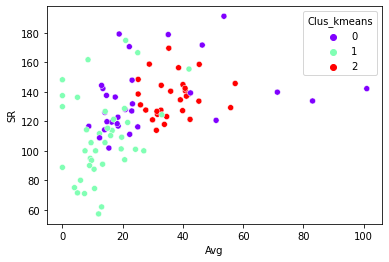

In [44]:
sns.scatterplot(df.Avg, df.SR , hue = df.Clus_kmeans, palette= "rainbow")

In [48]:
clust_profile=df.groupby('Clus_kmeans').mean()
clust_profile['freq']=df.Clus_kmeans.value_counts().sort_index()
clust_profile

,POS,Mat,Inns,NO,Runs,Avg,BF,SR,100,50,4s,6s,sil_width,freq
Clus_kmeans,,,,,,,,,,,,,,
0,46.566667,12.466667,9.666667,2.800000,158.100000,29.062667,117.000000,135.236667,0.000000,0.666667,12.233333,7.866667,0.123071,30
1,78.487805,6.439024,3.585366,1.097561,39.414634,13.540488,36.731707,108.884878,0.000000,0.073171,3.487805,0.878049,0.436587,41
2,15.464286,13.535714,13.285714,1.964286,408.000000,36.786786,301.571429,136.650714,0.107143,2.964286,35.821429,16.000000,0.260325,28


In [66]:
df.head()

,POS,PLAYER,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s,Clus_kmeans,sil_width
0,1,KL Rahul,14,14,2,670,132*,55.83,518,129.34,1,5,58,23,2,0.254231
1,3,David Warner,16,16,2,548,85*,39.14,407,134.64,0,4,52,14,2,0.447561
2,4,Shreyas Iyer,17,17,2,519,88*,34.60,421,123.27,0,3,40,16,2,0.424985
3,5,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30,2,0.350674
4,6,Quinton de Kock,16,16,2,503,78*,35.92,358,140.50,0,4,46,22,2,0.455808


In [90]:
pd.crosstab(df.PLAYER,df.Clus_kmeans).T

PLAYER,AB de Villiers,Aaron Finch,Abdul Samad,Abhishek Sharma,Ajinkya Rahane,Alex Carey,Ambati Rayudu,Andre Russell,Axar Patel,Ben Stokes,Chris Gayle,Chris Jordan,Chris Morris,David Warner,Deepak Hooda,Devdutt Padikkal,Dinesh Karthik,Eoin Morgan,Faf du Plessis,Glenn Maxwell,Gurkeerat Mann Singh,Hardik Pandya,Harshal Patel,Imran Tahir,Ishan Kishan,Isuru Udana,James Pattinson,Jason Holder,Jimmy Neesham,Jofra Archer,Jonny Bairstow,Josh Philippe,Jos Buttler,KL Rahul,Kagiso Rabada,Kamlesh Nagarkoti,Kane Williamson,Karun Nair,Kedar Jadhav,Kieron Pollard,...,Pat Cummins,Prithvi Shaw,Priyam Garg,Quinton de Kock,Rahul Tewatia,Rahul Tripathi,Rashid Khan,Ravichandran Ashwin,Ravindra Jadeja,Rinku Singh,Rishabh Pant,Riyan Parag,Robin Uthappa,Rohit Sharma,Ruturaj Gaikwad,Sam Curran,Sandeep Sharma,Sanju Samson,Sarfaraz Khan,Saurabh Tiwary,Shane Watson,Shardul Thakur,Shimron Hetmyer,Shivam Dube,Shivam Mavi,Shreyas Gopal,Shreyas Iyer,Shubman Gill,Simran Singh,Steve Smith,Sunil Narine,Suryakumar Yadav,Tom Banton,Tom Curran,Tushar Deshpande,Vijay Shankar,Virat Kohli,Washington Sundar,Wriddhiman Saha,Yashasvi Jaiswal
Clus_kmeans,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,...,1,1,1,0,1,1,1,1,1,0,0,0,1,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0
1,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,1,0,1,1,1,1,0,0,1,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,1,0,0,0,1
2,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0


In [89]:
df.groupby(['PLAYER','Clus_kmeans']).last()

,,POS,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s,sil_width
PLAYER,Clus_kmeans,,,,,,,,,,,,,,
AB de Villiers,2,10,15,14,4,454,73*,45.40,286,158.74,0,5,33,23,0.351614
Aaron Finch,0,31,12,12,0,268,52,22.33,241,111.20,0,1,28,8,0.053688
Abdul Samad,0,54,12,8,3,111,33,22.20,65,170.76,0,0,8,6,0.181560
Abhishek Sharma,1,64,8,7,2,71,31,14.20,56,126.78,0,0,6,3,0.306027
Ajinkya Rahane,1,52,9,8,0,113,60,14.12,107,105.60,0,1,12,2,0.286577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vijay Shankar,1,59,7,5,1,97,52*,24.25,96,101.04,0,1,10,1,0.407787
Virat Kohli,2,9,15,15,4,466,90*,42.36,384,121.35,0,3,23,11,0.285924
Washington Sundar,0,53,15,9,3,111,30,18.50,95,116.84,0,0,10,2,0.143563


In [91]:
df.to_csv('ipl_batsmen_tier.csv')

## **Tier 1 Batsmen** - Cluster Label 2
---
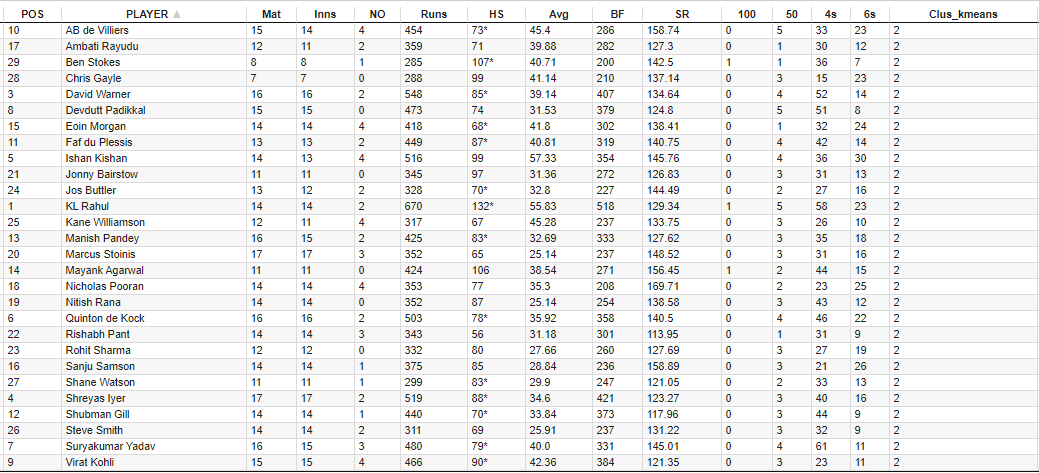
These are those batsmen who performed very well in the IPL 2020 Season:
- Most Runs Scored 
- Highest Averages
- Highest Strike Rate
- Less number in frequency
- Most boundaries hit


---
## **Tier 2 Batsmen** - Cluster Label 1
---
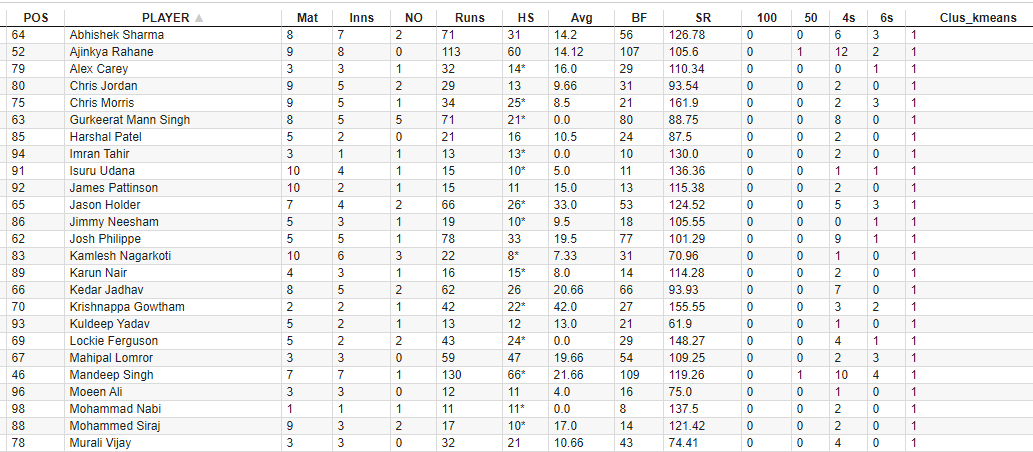

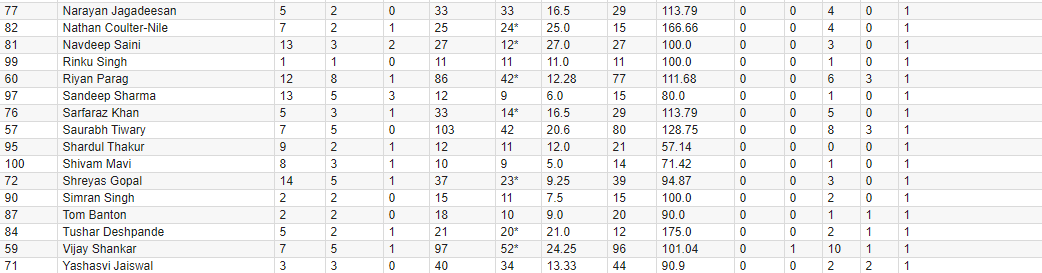


These are those batsmen who performed moderately well in the IPL 2020 Season:
- Huge difference was seen between **Tier** **1** Batsmen Runs Scored and **Tier** **2**
- Moderate Averages
- Strike Rate more a less same as **Tier 1 Batsmen**
---
## **Tier 3 Batsmen** - Cluster Label 0
---
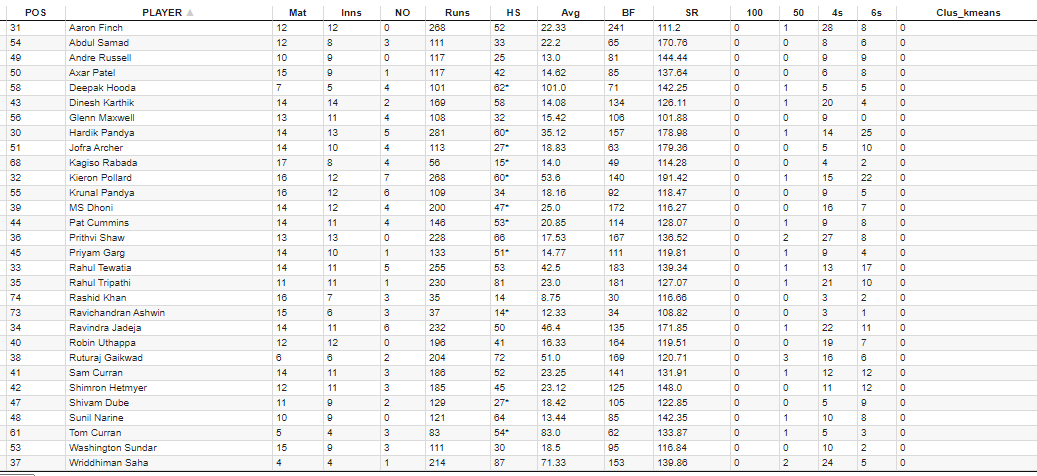
These are those batsmen who performed moderately well in the IPL 2020 Season:
- Least Runs Scored 
- Least Averages
- Least Strike Rate
- More number of players
- Least boundaries hit
---

## HAPPY LEARNING.....!!